# Rajendran_Gokul_DS102 Project

Importing the necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I would want to read in the datasets and find what I'm dealing with and get the relevant info

In [3]:
free_response_df = pd.read_csv('freeFormResponses.csv')
#free_response_df.head()
#free_response_df.info()

mc_response_df = pd.read_csv('multipleChoiceResponses.csv')
#mc_response_df.head()
#mc_response_df.info()
#mc_response_df.describe()

survey_df = pd.read_csv('SurveySchema.csv')
#survey_df.head()
#survey_df.info()
#survey_df.describe()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the data in a table form based on the questions as rows and ans as columns

In [4]:
mc_response_df.iloc[:1].transpose().head()

,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your gender? - Selected Choice
Q1_OTHER_TEXT,What is your gender? - Prefer to self-describe...
Q2,What is your age (# years)?
Q3,In which country do you currently reside?


Clean by droping empty cells,groupby(language),count and melt it based the type of languages these people stated in qn 16 in the survey

In [6]:
column_names = ["Q16_Part_" + str(x) for x in range(1, 19)]

qn_16 = mc_response_df[column_names]
print(qn_16.iloc[1:])
grouped = pd.melt(qn_16.iloc[1:], var_name="Qn Part", value_name="Language") \
    .dropna() \
    .groupby('Language') \
    .count()

#grouped.head()


      Q16_Part_1 Q16_Part_2 Q16_Part_3 Q16_Part_4 Q16_Part_5  \
1            NaN        NaN        NaN        NaN        NaN   
2            NaN        NaN        SQL        NaN        NaN   
3            NaN          R        NaN        NaN       Java   
4         Python          R        SQL       Bash        NaN   
5            NaN        NaN        SQL        NaN       Java   
6         Python        NaN        NaN       Bash        NaN   
7            NaN          R        NaN        NaN        NaN   
8         Python        NaN        NaN        NaN        NaN   
9         Python        NaN        NaN        NaN        NaN   
10        Python        NaN        SQL        NaN       Java   
11        Python          R        SQL        NaN        NaN   
12        Python        NaN        SQL        NaN       Java   
13        Python          R        SQL       Bash        NaN   
14        Python          R        SQL       Bash        NaN   
15        Python          R        SQL  

Creating a new dataframe based on genders in qn1 of the survey

In [7]:
qn_1 = mc_response_df["Q1"].iloc[1:]

gender = pd.DataFrame(qn_1)
gender = gender.groupby(['Q1'],as_index=False).size()
gender = pd.DataFrame(gender, columns = ['count'])
gender.index.name = 'Gender'
gender


,count
Gender,
Female,4010
Male,19430
Prefer not to say,340
Prefer to self-describe,79


Problem Statement: How to using various programming lanuages are? What are the trend of based on language,gender, occupation and otherr variables?

Firstly , you plot a graph based on the lanuages count and you see that Python is the most popular (by alot) then SQL and R, 

Text(0,0.5,'Total Count')

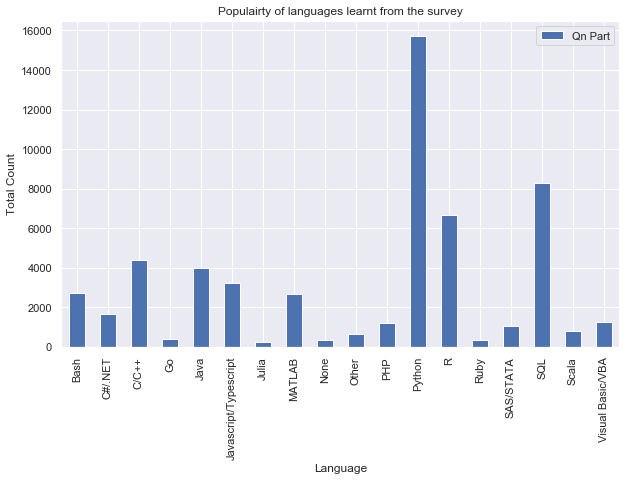

In [8]:
sns.set()
FIG_SIZE = (10, 6)

fig, ax = plt.subplots(figsize=FIG_SIZE)

grouped.plot(kind='bar',  
             ax=ax)

ax.set_title('Populairty of languages learnt from the survey')
ax.set_ylabel('Total Count')

We use to findthis piechart to find out that most of the responses comes from males, hence we do get results skweing towards the male demographic and presence

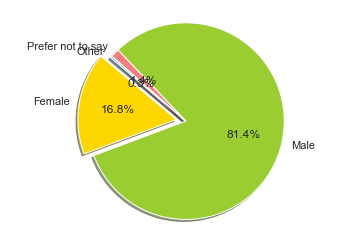

In [9]:
explode = (0.1, 0, 0, 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
labels = ['Female','Male','Prefer not to say','Other']

plt.pie(gender, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Creating a new dataframe with gender, their role, country and level of education by taking relevant questions

In [10]:
new_df = mc_response_df['Q1']
new_df = pd.DataFrame(new_df)
new_df['Role'] = mc_response_df['Q6']
new_df.rename(columns={'Q1':'Gender'}, inplace=True)
new_df['Country'] = mc_response_df['Q3']
new_df['Level of education'] = mc_response_df['Q4']
new_df['Age'] = mc_response_df['Q2']
new_df['Experience'] = mc_response_df['Q8']
new_df['Money'] = mc_response_df['Q9']
new_df['Duration'] = mc_response_df['Time from Start to Finish (seconds)']

new_df = new_df.ix[1:]
new_df['Duration'] = pd.to_numeric(new_df['Duration'])

new_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


,Gender,Role,Country,Level of education,Age,Experience,Money,Duration
1,Female,Consultant,United States of America,Doctoral degree,45-49,NaN,NaN,710
2,Male,Other,Indonesia,Bachelor’s degree,30-34,5-10,"10-20,000",434
3,Female,Data Scientist,United States of America,Master’s degree,30-34,0-1,"0-10,000",718
4,Male,Not employed,United States of America,Master’s degree,35-39,NaN,NaN,621
5,Male,Data Analyst,India,Master’s degree,22-24,0-1,"0-10,000",731


In [11]:
new_df.dtypes

Gender                object
Role                  object
Country               object
Level of education    object
Age                   object
Experience            object
Money                 object
Duration               int64
dtype: object

Faced a lot of difficulty when doing scatterplot/boxplot or even heat map as the values are as an 'object' and non-null object and unable to convert them to a integer/number as they represent a range of values

Tried to work through the problem by using groupby and size to get integer values

In [12]:
money_df = new_df.groupby(['Money']).size()
money_df.head()

Money
0-10,000       4398
10-20,000      1937
100-125,000     843
125-150,000     533
150-200,000     457
dtype: int64

Created a bar chart to find out how much people earn and that most people are reluctant to reveal their salary as seen in the graph or are mostly students earning,$0 (this is supported by the graph below where we look the role)

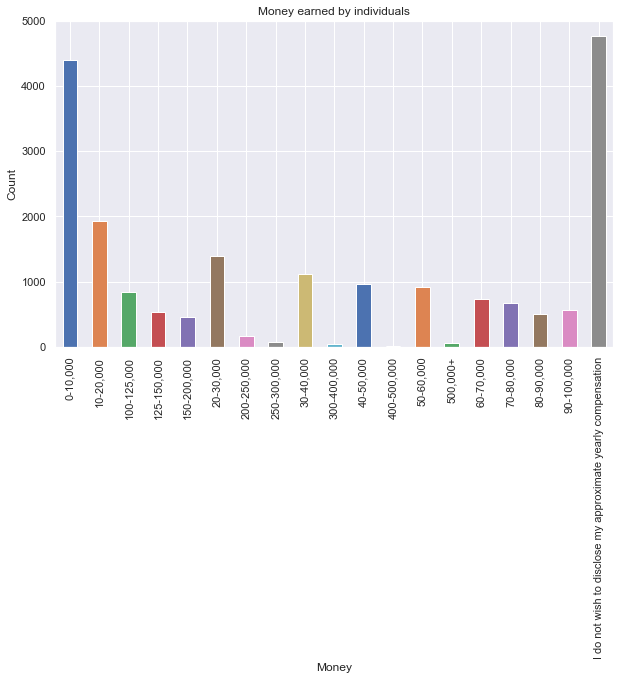

In [282]:
fig, ax = plt.subplots()

money_df.plot(kind='bar',
             stacked=True, 
             figsize=FIG_SIZE,
             ax=ax)

ax.set_title('Money earned by individuals')
ax.set_ylabel("Count")
plt.show()

In [290]:
jobs_df = new_df.groupby(['Role']).size()
jobs_df.head()

Role
Business Analyst          772
Chief Officer             360
Consultant                785
DBA/Database Engineer     145
Data Analyst             1922
dtype: int64

Jobs datafram is created based on roles and found out that mostly students took the survey, followed my data scientist as they came in second

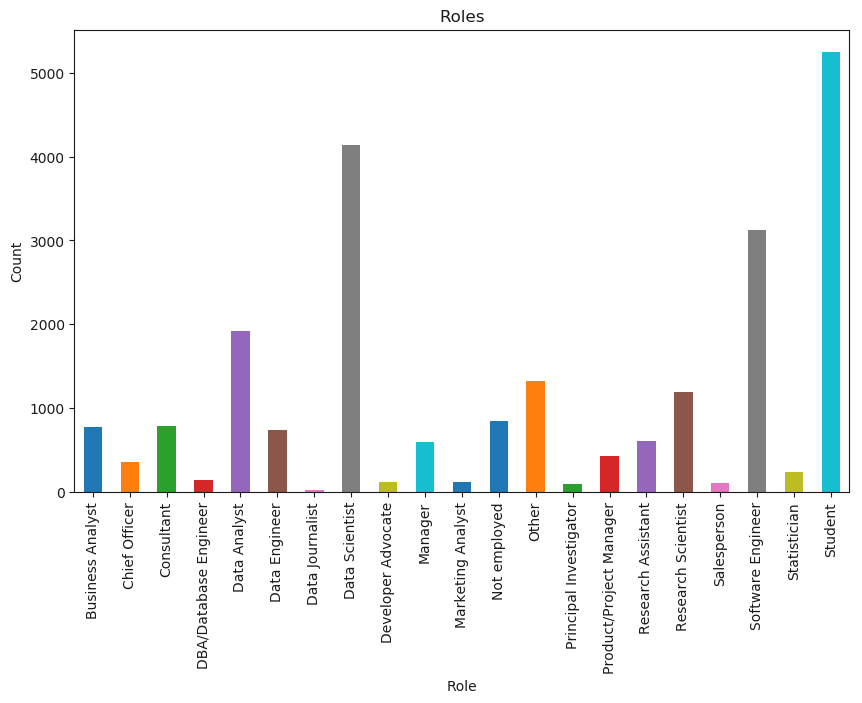

In [292]:
fig, ax = plt.subplots()

jobs_df.plot(kind='bar',
             stacked=True, 
             figsize=FIG_SIZE,
             ax=ax)

ax.set_title('Roles')
ax.set_ylabel("Count")
plt.show()

created a specific data frame for fata scientist, looking at their income levels only

In [391]:
data_scientist_df = pd.DataFrame(new_df)
data_scientist_df = data_scientist_df[data_scientist_df['Role'] == 'Data Scientist']
data_scientist_df = data_scientist_df.groupby('Money').count()
del data_scientist_df['Role']
del data_scientist_df['Country']
del data_scientist_df['Level of education']
del data_scientist_df['Age']
del data_scientist_df['Experience']
data_scientist_df.rename(columns={'Gender':'Count'}, inplace=True)

data_scientist_df["New"] = data_scientist_df.index
data_scientist_df.head()


,Count,Duration,New
Money,,,
"0-10,000",461,461,"0-10,000"
"10-20,000",347,347,"10-20,000"
"100-125,000",267,267,"100-125,000"
"125-150,000",191,191,"125-150,000"
"150-200,000",145,145,"150-200,000"


#data_scientist_df['New'].astype(float)
tried this but was unable to convert to float as they could not convert string to float: 'I do not wish to disclose my approximate yearly compensation'



In [394]:
data_scientist_df = data_scientist_df[data_scientist_df['New'] != 'I do not wish to disclose my approximate yearly compensation']
data_scientist_df['New'].astype(float)

ValueError: could not convert string to float: '90-100,000'

In [ ]:
created a df to better illustrate the time taken for various roles and ages to fill up the survey

In [367]:
pd.pivot_table(new_df,index=["Role"]).head()

,Duration
Role,
Business Analyst,12343.757772
Chief Officer,11928.194444
Consultant,7191.677707
DBA/Database Engineer,10294.668966
Data Analyst,12837.425598


Various roles and the age group they lie in

In [374]:
pivot = new_df.pivot_table(index=['Role'],
                       columns=['Age'],
                       values='Money',
                       aggfunc='count').reset_index()
pivot.head()

Age,Role,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70-79,80+
0,Business Analyst,30.0,121.0,241.0,156.0,73.0,48.0,25.0,22.0,9.0,4.0,NaN,NaN
1,Chief Officer,7.0,11.0,38.0,53.0,55.0,51.0,55.0,36.0,18.0,13.0,3.0,2.0
2,Consultant,6.0,56.0,170.0,136.0,96.0,77.0,64.0,46.0,37.0,37.0,12.0,2.0
3,DBA/Database Engineer,1.0,18.0,30.0,38.0,18.0,9.0,8.0,9.0,3.0,4.0,NaN,NaN
4,Data Analyst,106.0,409.0,595.0,333.0,146.0,79.0,48.0,28.0,17.0,11.0,2.0,2.0


In [387]:
pivot['18-21'].astype(float)


0       30.0
1        7.0
2        6.0
3        1.0
4      106.0
5       29.0
6        NaN
7      186.0
8        4.0
9        6.0
10       1.0
11       0.0
12      30.0
13       NaN
14       5.0
15      40.0
16      21.0
17       7.0
18     179.0
19       8.0
20    1613.0
Name: 18-21, dtype: float64

Managed to create a df thaat contains the roles and the amount that they earn

In [410]:
new_pivoted_df = pd.pivot_table(new_df,
                         index=['Role'],
                         columns=['Money'],
                         values='Age',
                         aggfunc='count')
new_pivoted_df.head()

Money,"0-10,000","10-20,000","100-125,000","125-150,000","150-200,000","20-30,000","200-250,000","250-300,000","30-40,000","300-400,000","40-50,000","400-500,000","50-60,000","500,000+","60-70,000","70-80,000","80-90,000","90-100,000",I do not wish to disclose my approximate yearly compensation
Role,,,,,,,,,,,,,,,,,,,
Business Analyst,95.0,104.0,22.0,6.0,8.0,64.0,1.0,NaN,47.0,NaN,46.0,NaN,54.0,4.0,46.0,32.0,30.0,31.0,139.0
Chief Officer,21.0,22.0,20.0,20.0,30.0,15.0,17.0,9.0,7.0,6.0,9.0,4.0,10.0,13.0,20.0,13.0,6.0,9.0,91.0
Consultant,63.0,55.0,58.0,28.0,32.0,51.0,13.0,4.0,54.0,1.0,47.0,1.0,40.0,4.0,39.0,21.0,26.0,36.0,166.0
DBA/Database Engineer,24.0,18.0,3.0,7.0,2.0,20.0,1.0,1.0,6.0,NaN,9.0,NaN,7.0,NaN,5.0,6.0,2.0,6.0,21.0
Data Analyst,372.0,217.0,67.0,19.0,8.0,135.0,2.0,1.0,113.0,2.0,100.0,3.0,99.0,3.0,96.0,79.0,66.0,46.0,348.0


In [ ]:
created a scatterplot of the lowest paying salary vs highest based on occupation/role

Text(0.5,1,'Scatterplot of Low Salary vs. High Salary')

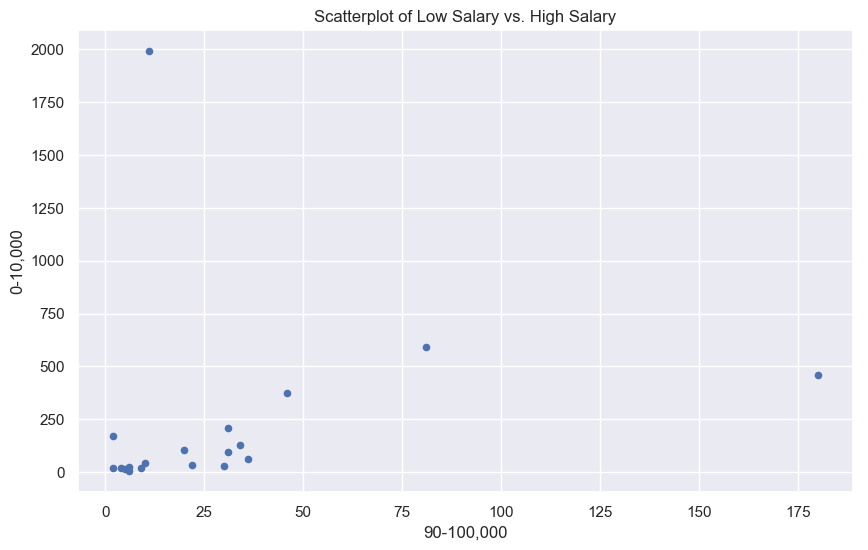

In [414]:
sns.set()

fig, ax = plt.subplots()

new_pivoted_df.plot(kind='scatter', 
            y='0-10,000',
            x='90-100,000',
            figsize=FIG_SIZE,
            ax=ax)

ax.set_title('Scatterplot of Low Salary vs. High Salary')

In [419]:
new_pivoted_df['90-100,000']

Role
Business Analyst            31.0
Chief Officer                9.0
Consultant                  36.0
DBA/Database Engineer        6.0
Data Analyst                46.0
Data Engineer               20.0
Data Journalist              NaN
Data Scientist             180.0
Developer Advocate           4.0
Manager                     30.0
Marketing Analyst            5.0
Other                       31.0
Principal Investigator       6.0
Product/Project Manager     22.0
Research Assistant           2.0
Research Scientist          34.0
Salesperson                  2.0
Software Engineer           81.0
Statistician                10.0
Student                     11.0
Name: 90-100,000, dtype: float64

Through our data visualisation, we were able to determine that 
-Python was the most used lanaguage
-Survey is filled with majority Males
-Most the of the individuals are students with 0-10k income or they prefer not to reveal sensative information
-There is a high number of data scientist
-Being a datascientist is one of the most lucrative ways to earn money as there is a high proprtion of them earnning in the high salary bracket of (90-100,000) as relative to the low salary bracket as seen in the scatter plot

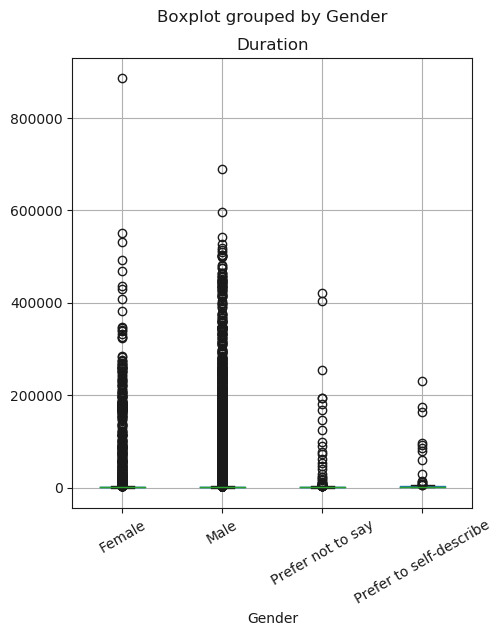

In [442]:

new_df.boxplot('Duration','Gender',rot = 30,figsize=(5,6))

Surprisingly, males take a longer time to decide and fill up the survey as compared to females, either they are indecisive or take more time and effort to fill up their survey

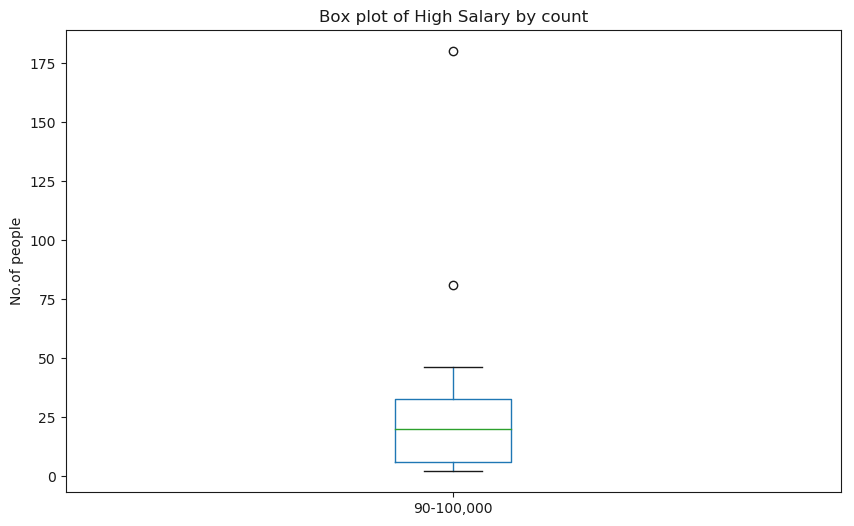

In [449]:

sns.reset_orig()

fig, ax = plt.subplots()

new_pivoted_df['90-100,000'].plot(kind='box', ax=ax, figsize=FIG_SIZE)

ax.set_ylabel("No.of people")
ax.set_title('Box plot of High Salary by count')

plt.show()

In [450]:
new_pivoted_df['90-100,000'].dropna()

def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)

IQR(new_pivoted_df['90-100,000'])

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


nan

In [ ]:
Unable to drop an